[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jkitchin/s26-06642/blob/main/dsmles/02-pandas-intro/pandas-intro.ipynb)

In [ ]:
! pip install -q pycse nbconvert
from pycse.colab import pdf

```{index} Pandas
```


# Module 02: Pandas Introduction

Pandas provides high-level data structures for working with tabular (spreadsheet-like) data.

## Learning Objectives

1. Create and manipulate DataFrames and Series
2. Load data from CSV, Excel, and other formats
3. Select and filter data
4. Handle missing values
5. Create basic visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

```{index} DataFrame, Series
```


## Why Pandas? From Arrays to Labeled Data

NumPy is powerful, but it has limitations for real-world data:

- **No column names**: You have to remember that column 0 is temperature, column 1 is pressure...
- **No mixed types**: Can't have strings and numbers in the same array
- **No built-in missing data**: NaN handling is awkward
- **No metadata**: Dates, categories, and units need manual tracking

### Enter Pandas

Pandas provides two main data structures:

- **Series**: A labeled 1D array (like a column in a spreadsheet)
- **DataFrame**: A labeled 2D table (like an entire spreadsheet)

The key innovation is **labels**. Instead of accessing data by position (`data[0, 2]`), you access it by name (`data['temperature']`). This makes code more readable and less error-prone.

### When to Use Pandas vs NumPy

| Use Pandas when... | Use NumPy when... |
|-------------------|-------------------|
| You have tabular data with column names | You need raw numerical performance |
| You need to join/merge datasets | You're doing linear algebra |
| You have mixed types (strings + numbers) | You're implementing algorithms |
| You need to handle missing data | You're building ML model internals |
| You're exploring and cleaning data | You're doing image processing |

In practice, you'll often use both: Pandas for data wrangling, then extract NumPy arrays for modeling.

In [2]:
# Create a Series
temperatures = pd.Series([300, 350, 400, 450, 500], name='temperature')
print(temperatures)
print("\nType:", type(temperatures))

0    300
1    350
2    400
3    450
4    500
Name: temperature, dtype: int64

Type: <class 'pandas.core.series.Series'>


In [3]:
# Create a DataFrame from a dictionary
data = {
    'temperature': [300, 350, 400, 450, 500],
    'pressure': [1.0, 1.5, 2.0, 2.5, 3.0],
    'catalyst': ['Pt', 'Pt', 'Pd', 'Pd', 'Pt'],
    'yield': [45.2, 52.8, 68.1, 75.4, 82.0]
}

df = pd.DataFrame(data)
df

,temperature,pressure,catalyst,yield
0,300,1.0,Pt,45.2
1,350,1.5,Pt,52.8
2,400,2.0,Pd,68.1
3,450,2.5,Pd,75.4
4,500,3.0,Pt,82.0


In [4]:
# Basic DataFrame info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Shape: (5, 4)

Columns: ['temperature', 'pressure', 'catalyst', 'yield']

Data types:
temperature      int64
pressure       float64
catalyst        object
yield          float64
dtype: object


In [5]:
# Quick summary statistics
df.describe()

,temperature,pressure,yield
count,5.000000,5.000000,5.000000
mean,400.000000,2.000000,64.700000
std,79.056942,0.790569,15.388307
min,300.000000,1.000000,45.200000
25%,350.000000,1.500000,52.800000
50%,400.000000,2.000000,68.100000
75%,450.000000,2.500000,75.400000
max,500.000000,3.000000,82.000000


```{index} read_csv
```


## Loading Data: Your Gateway to Real Datasets

In real work, you rarely create DataFrames from scratch. Instead, you load data from files, databases, or web APIs. Pandas makes this remarkably easy.

### The Most Common Scenario: CSV Files

CSV (Comma-Separated Values) is the universal exchange format for tabular data. Every instrument, database, and software can export CSV. This is often your first step:

```python
df = pd.read_csv('my_data.csv')
```

### What Can Go Wrong?

Real data is messy. Here are common issues and how Pandas handles them:

| Problem | Solution |
|---------|----------|
| Wrong delimiter (tabs, semicolons) | `sep='\t'` or `sep=';'` |
| Header on wrong row | `header=2` (0-indexed) |
| Missing values coded as text | `na_values=['NA', 'missing', '-']` |
| Too large to fit in memory | `usecols=['temp', 'yield']` or `nrows=1000` |
| Encoding issues (accented characters) | `encoding='utf-8'` or `'latin-1'` |

**Pro tip**: Always inspect your data immediately after loading with `df.head()`, `df.info()`, and `df.describe()`. Catch problems early!

In [6]:
# Create sample data file
sample_data = """experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
EXP001,300,1.0,Pt/Al2O3,0.45,0.92,baseline
EXP002,350,1.0,Pt/Al2O3,0.58,0.89,
EXP003,400,1.0,Pt/Al2O3,0.72,0.85,
EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
EXP005,400,1.0,Pd/Al2O3,0.65,0.91,different catalyst
EXP006,450,1.0,Pt/Al2O3,0.81,0.79,
EXP007,450,1.5,Pt/Al2O3,0.85,0.77,
EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp
EXP009,500,1.0,Pd/Al2O3,,0.82,catalyst test - no conversion data
EXP010,350,1.0,Pt/Al2O3,0.57,0.90,replicate of EXP002
"""

with open('experiments.csv', 'w') as f:
    f.write(sample_data)

In [7]:
# Load CSV
df = pd.read_csv('experiments.csv')
df

,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
0,EXP001,300,1.0,Pt/Al2O3,0.45,0.92,baseline
1,EXP002,350,1.0,Pt/Al2O3,0.58,0.89,NaN
2,EXP003,400,1.0,Pt/Al2O3,0.72,0.85,NaN
3,EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
4,EXP005,400,1.0,Pd/Al2O3,0.65,0.91,different catalyst
5,EXP006,450,1.0,Pt/Al2O3,0.81,0.79,NaN
6,EXP007,450,1.5,Pt/Al2O3,0.85,0.77,NaN
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp
8,EXP009,500,1.0,Pd/Al2O3,NaN,0.82,catalyst test - no conversion data
9,EXP010,350,1.0,Pt/Al2O3,0.57,0.90,replicate of EXP002


In [8]:
# Useful read_csv options:
# pd.read_csv('file.csv', 
#     sep=',',           # Delimiter
#     header=0,          # Row number for column names
#     index_col=0,       # Column to use as index
#     usecols=[0,1,2],   # Only load specific columns
#     nrows=100,         # Only load first N rows
#     skiprows=5,        # Skip first N rows
#     na_values=['NA', 'missing']  # Values to treat as NaN
# )

# Other formats:
# pd.read_excel('file.xlsx')
# pd.read_json('file.json')
# pd.read_sql('SELECT * FROM table', connection)

```{index} boolean filtering, iloc, loc
```


## Selecting Data: The Core Skill

Data selection is what you'll do most often in Pandas. There are multiple ways to select data, and choosing the right one matters:

### The Selection Zoo

| Syntax | What it does | Returns |
|--------|--------------|---------|
| `df['col']` | Select one column | Series |
| `df[['col1', 'col2']]` | Select multiple columns | DataFrame |
| `df.iloc[0]` | Select row by position | Series |
| `df.iloc[0:5]` | Select rows by position range | DataFrame |
| `df.loc['label']` | Select row by index label | Series |
| `df[df['col'] > 5]` | Filter rows by condition | DataFrame |

### The Most Powerful Pattern: Boolean Filtering

This is the pattern you'll use most often:

```python
df[condition]  # Returns rows where condition is True
```

Conditions can be combined with `&` (and), `|` (or), and `~` (not). Always wrap each condition in parentheses:

```python
df[(df['temp'] > 400) & (df['pressure'] < 5)]
```

### Common Mistake: `and` vs `&`

Python's `and` doesn't work with Pandas! Use `&` instead. This is because Pandas needs to apply the operation element-wise.

In [9]:
# Select a column (returns Series)
df['temperature']

0    300
1    350
2    400
3    400
4    400
5    450
6    450
7    500
8    500
9    350
Name: temperature, dtype: int64

In [10]:
# Select multiple columns (returns DataFrame)
df[['temperature', 'conversion', 'selectivity']]

,temperature,conversion,selectivity
0,300,0.45,0.92
1,350,0.58,0.89
2,400,0.72,0.85
3,400,0.78,0.83
4,400,0.65,0.91
5,450,0.81,0.79
6,450,0.85,0.77
7,500,0.89,0.71
8,500,NaN,0.82
9,350,0.57,0.90


In [11]:
# Select rows by position with .iloc
print("First row:")
print(df.iloc[0])

print("\nFirst 3 rows:")
print(df.iloc[:3])

First row:
experiment_id      EXP001
temperature           300
pressure              1.0
catalyst         Pt/Al2O3
conversion           0.45
selectivity          0.92
notes            baseline
Name: 0, dtype: object

First 3 rows:
  experiment_id  temperature  pressure  catalyst  conversion  selectivity  \
0        EXP001          300       1.0  Pt/Al2O3        0.45         0.92   
1        EXP002          350       1.0  Pt/Al2O3        0.58         0.89   
2        EXP003          400       1.0  Pt/Al2O3        0.72         0.85   

      notes  
0  baseline  
1       NaN  
2       NaN  


In [12]:
# Select rows by label with .loc
df_indexed = df.set_index('experiment_id')
print(df_indexed.loc['EXP003'])

temperature         400
pressure            1.0
catalyst       Pt/Al2O3
conversion         0.72
selectivity        0.85
notes               NaN
Name: EXP003, dtype: object


In [13]:
# Boolean filtering - most common in practice!
# Find high-temperature experiments
high_temp = df[df['temperature'] >= 400]
high_temp

,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
2,EXP003,400,1.0,Pt/Al2O3,0.72,0.85,NaN
3,EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
4,EXP005,400,1.0,Pd/Al2O3,0.65,0.91,different catalyst
5,EXP006,450,1.0,Pt/Al2O3,0.81,0.79,NaN
6,EXP007,450,1.5,Pt/Al2O3,0.85,0.77,NaN
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp
8,EXP009,500,1.0,Pd/Al2O3,NaN,0.82,catalyst test - no conversion data


In [14]:
# Multiple conditions (use & for AND, | for OR)
# High temp AND high conversion
subset = df[(df['temperature'] >= 400) & (df['conversion'] > 0.7)]
subset

,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
2,EXP003,400,1.0,Pt/Al2O3,0.72,0.85,NaN
3,EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
5,EXP006,450,1.0,Pt/Al2O3,0.81,0.79,NaN
6,EXP007,450,1.5,Pt/Al2O3,0.85,0.77,NaN
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp


In [15]:
# Filter by categorical values
pt_experiments = df[df['catalyst'] == 'Pt/Al2O3']
print(f"Pt experiments: {len(pt_experiments)}")

# Filter by multiple values
selected_temps = df[df['temperature'].isin([300, 400, 500])]
selected_temps

Pt experiments: 8


,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
0,EXP001,300,1.0,Pt/Al2O3,0.45,0.92,baseline
2,EXP003,400,1.0,Pt/Al2O3,0.72,0.85,NaN
3,EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
4,EXP005,400,1.0,Pd/Al2O3,0.65,0.91,different catalyst
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp
8,EXP009,500,1.0,Pd/Al2O3,NaN,0.82,catalyst test - no conversion data


```{index} missing values, NaN, dropna, fillna
```


## Handling Missing Data: The Unavoidable Reality

Real experimental data almost always has missing values. Sensors fail, experiments are interrupted, data entry has errors. Pandas uses `NaN` (Not a Number) to represent missing data.

### Why Missing Data Matters

Many operations fail or give wrong results with missing data:
- Mean of `[1, 2, NaN]` could be 1.5 or undefined
- ML models often can't handle NaN
- Joins may drop rows unexpectedly

### Strategies for Missing Data

There's no universal solution—the right choice depends on *why* the data is missing:

| Strategy | When to Use | Pandas Method |
|----------|-------------|---------------|
| **Drop rows** | Data is missing randomly, you have plenty of data | `df.dropna()` |
| **Drop columns** | A column has too many missing values to be useful | `df.drop(columns=['col'])` |
| **Fill with constant** | You have a meaningful default value | `df.fillna(0)` |
| **Fill with mean/median** | Missing at random, want to preserve distribution | `df.fillna(df.mean())` |
| **Forward fill** | Time series where last value carries forward | `df.ffill()` |
| **Interpolate** | Time series with gradual changes | `df.interpolate()` |

### The Key Question

Before choosing a strategy, ask: **Why is this data missing?**

- **Missing Completely at Random (MCAR)**: Sensor battery died → safe to drop or impute
- **Missing at Random (MAR)**: High-temp experiments failed more often → imputation may bias results
- **Missing Not at Random (MNAR)**: Conversion too low to measure → dropping creates selection bias

For MNAR data, no simple fix works. You may need domain expertise or more sophisticated methods.

In [16]:
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

print("\nRows with any missing values:")
print(df[df.isna().any(axis=1)])

Missing values per column:
experiment_id    0
temperature      0
pressure         0
catalyst         0
conversion       1
selectivity      0
notes            4
dtype: int64

Rows with any missing values:
  experiment_id  temperature  pressure  catalyst  conversion  selectivity  \
1        EXP002          350       1.0  Pt/Al2O3        0.58         0.89   
2        EXP003          400       1.0  Pt/Al2O3        0.72         0.85   
5        EXP006          450       1.0  Pt/Al2O3        0.81         0.79   
6        EXP007          450       1.5  Pt/Al2O3        0.85         0.77   
8        EXP009          500       1.0  Pd/Al2O3         NaN         0.82   

                                notes  
1                                 NaN  
2                                 NaN  
5                                 NaN  
6                                 NaN  
8  catalyst test - no conversion data  


In [17]:
# Options for handling missing data

# 1. Drop rows with missing values
df_dropped = df.dropna()
print(f"Original: {len(df)} rows, After dropna: {len(df_dropped)} rows")

# 2. Drop only if specific columns are missing
df_dropped2 = df.dropna(subset=['conversion'])

# 3. Fill with a value
df_filled = df.fillna({'conversion': df['conversion'].mean()})

# 4. Forward fill (useful for time series)
# df_ffill = df.fillna(method='ffill')

Original: 10 rows, After dropna: 5 rows


## Adding and Modifying Columns

In [18]:
# Create a working copy
df_work = df.copy()

# Add a calculated column
df_work['yield'] = df_work['conversion'] * df_work['selectivity'] * 100

# Add temperature in Celsius
df_work['temp_C'] = df_work['temperature'] - 273.15

df_work[['experiment_id', 'temperature', 'temp_C', 'conversion', 'selectivity', 'yield']]

,experiment_id,temperature,temp_C,conversion,selectivity,yield
0,EXP001,300,26.85,0.45,0.92,41.40
1,EXP002,350,76.85,0.58,0.89,51.62
2,EXP003,400,126.85,0.72,0.85,61.20
3,EXP004,400,126.85,0.78,0.83,64.74
4,EXP005,400,126.85,0.65,0.91,59.15
5,EXP006,450,176.85,0.81,0.79,63.99
6,EXP007,450,176.85,0.85,0.77,65.45
7,EXP008,500,226.85,0.89,0.71,63.19
8,EXP009,500,226.85,NaN,0.82,NaN
9,EXP010,350,76.85,0.57,0.90,51.30


In [19]:
# Categorize based on conditions
def classify_temp(temp):
    if temp < 350:
        return 'low'
    elif temp < 450:
        return 'medium'
    else:
        return 'high'

df_work['temp_category'] = df_work['temperature'].apply(classify_temp)
df_work[['experiment_id', 'temperature', 'temp_category']]

,experiment_id,temperature,temp_category
0,EXP001,300,low
1,EXP002,350,medium
2,EXP003,400,medium
3,EXP004,400,medium
4,EXP005,400,medium
5,EXP006,450,high
6,EXP007,450,high
7,EXP008,500,high
8,EXP009,500,high
9,EXP010,350,medium


## Basic Visualization with Pandas

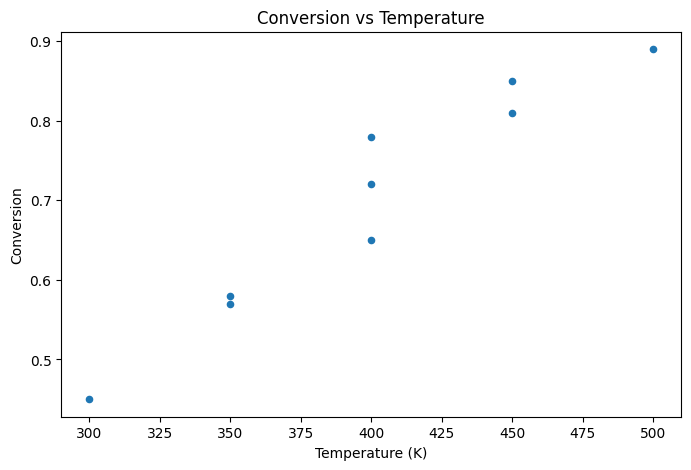

In [20]:
# Scatter plot
df.plot.scatter(x='temperature', y='conversion', figsize=(8, 5))
plt.xlabel('Temperature (K)')
plt.ylabel('Conversion')
plt.title('Conversion vs Temperature')
plt.show()

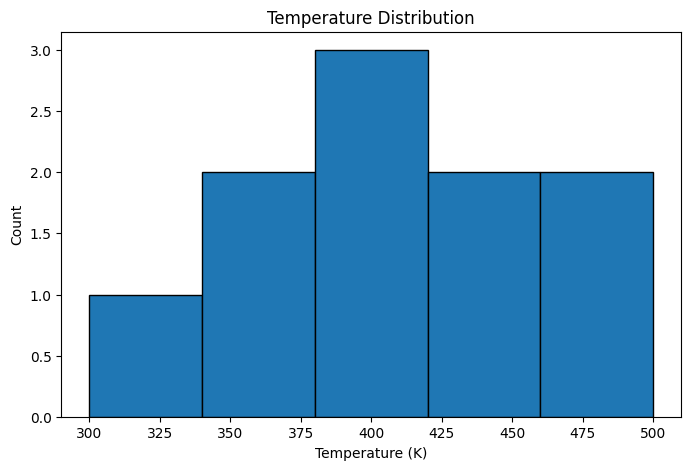

In [21]:
# Histogram
df['temperature'].plot.hist(bins=5, edgecolor='black', figsize=(8, 5))
plt.xlabel('Temperature (K)')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.show()

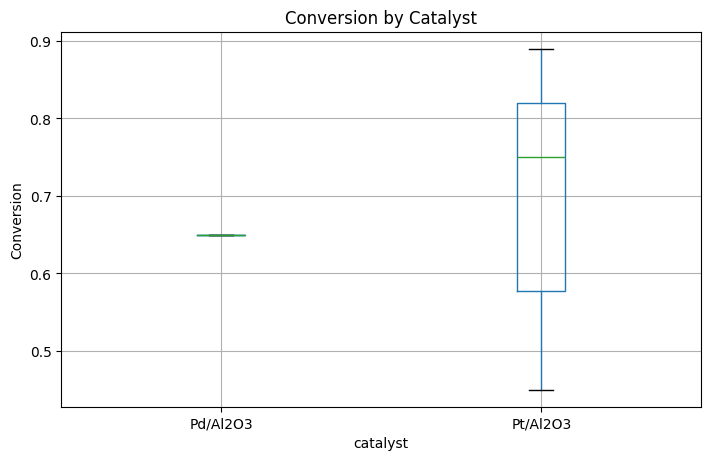

In [22]:
# Box plot by category
df.boxplot(column='conversion', by='catalyst', figsize=(8, 5))
plt.ylabel('Conversion')
plt.title('Conversion by Catalyst')
plt.suptitle('')  # Remove automatic title
plt.show()

## Sorting and Ranking

In [23]:
# Sort by one column
df.sort_values('conversion', ascending=False)

,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp
6,EXP007,450,1.5,Pt/Al2O3,0.85,0.77,NaN
5,EXP006,450,1.0,Pt/Al2O3,0.81,0.79,NaN
3,EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
2,EXP003,400,1.0,Pt/Al2O3,0.72,0.85,NaN
4,EXP005,400,1.0,Pd/Al2O3,0.65,0.91,different catalyst
1,EXP002,350,1.0,Pt/Al2O3,0.58,0.89,NaN
9,EXP010,350,1.0,Pt/Al2O3,0.57,0.90,replicate of EXP002
0,EXP001,300,1.0,Pt/Al2O3,0.45,0.92,baseline
8,EXP009,500,1.0,Pd/Al2O3,NaN,0.82,catalyst test - no conversion data


In [24]:
# Sort by multiple columns
df.sort_values(['catalyst', 'temperature'])

,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
4,EXP005,400,1.0,Pd/Al2O3,0.65,0.91,different catalyst
8,EXP009,500,1.0,Pd/Al2O3,NaN,0.82,catalyst test - no conversion data
0,EXP001,300,1.0,Pt/Al2O3,0.45,0.92,baseline
1,EXP002,350,1.0,Pt/Al2O3,0.58,0.89,NaN
9,EXP010,350,1.0,Pt/Al2O3,0.57,0.90,replicate of EXP002
2,EXP003,400,1.0,Pt/Al2O3,0.72,0.85,NaN
3,EXP004,400,2.0,Pt/Al2O3,0.78,0.83,high pressure
5,EXP006,450,1.0,Pt/Al2O3,0.81,0.79,NaN
6,EXP007,450,1.5,Pt/Al2O3,0.85,0.77,NaN
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp


In [25]:
# Get top/bottom N
print("Top 3 by conversion:")
df.nlargest(3, 'conversion')

Top 3 by conversion:


,experiment_id,temperature,pressure,catalyst,conversion,selectivity,notes
7,EXP008,500,1.0,Pt/Al2O3,0.89,0.71,high temp
6,EXP007,450,1.5,Pt/Al2O3,0.85,0.77,NaN
5,EXP006,450,1.0,Pt/Al2O3,0.81,0.79,NaN


## Saving Data

In [26]:
# Save to CSV
df_work.to_csv('experiments_processed.csv', index=False)

# Other formats:
# df_work.to_excel('experiments.xlsx', index=False)
# df_work.to_json('experiments.json')

print("Data saved!")

Data saved!


---

## The Catalyst Crisis: "The Ghost in the Data"

*Continued from NumPy...*

---

"Fifteen percent of the temperature readings are missing," Alex announced to her study group. "And I know why."

Jordan looked up from his laptop, interested for the first time all week. Sam didn't look up at all, fingers flying across their keyboard.

"Shift changes," Alex continued. "The gaps cluster at 11 PM, 3 AM, and 7 AM. Operators are supposed to log backup readings when sensors drop out, but during handoffs, it's getting missed."

Maya frowned. "So we just... fill them in? Take the average?"

"That's what I thought initially." Alex pulled up a visualization she'd built—a heatmap showing missing values by time and reactor conditions. "But look at this. The missingness isn't random. It correlates with high-temperature excursions."

Jordan leaned in. "The sensors are dropping out precisely when things get interesting."

"Exactly. If we just fill in the mean, we're erasing exactly the moments that might matter most."

Sam finally looked up. "So what do you do?"

Alex hesitated. This was the part she wasn't sure about. "I think... the missing data itself is information. We shouldn't just fill it in. We should flag it. Track which batches have missing readings during high-temperature events."

"That's a lot of extra work," Sam said.

"It's the right extra work."

That afternoon, Frank Morrison—ChemCorp's process engineer and the Academy's industrial liaison—joined their virtual meeting. He had the skeptical look of someone who'd seen too many consultants come and go.

"So you've spent a week looking at missing data," he said. "We knew the sensors were unreliable. What's new?"

Alex took a breath. "The sensors fail during temperature excursions. Which means your worst batches—the ones you most need to understand—are the ones with the least data."

Frank was quiet for a moment. "Huh. We always assumed the sensor failures were random."

"They're not. And I think that's a clue."

After the call, Jordan caught Alex in the hallway. "That was good. The way you pushed back."

"I wasn't sure I should."

"You had evidence. That's all the permission you need."

Alex added to the mystery board: **Missing data correlates with temperature excursions. Sensor failures aren't random—they're symptoms.**

*To be continued...*

## Quiz: Test Your Understanding

Test your knowledge of the Pandas concepts covered in this module.

In [27]:
! pip install -q jupyterquiz
from jupyterquiz import display_quiz

display_quiz("https://raw.githubusercontent.com/jkitchin/s26-06642/main/dsmles/02-pandas-intro/quizzes/pandas-intro-quiz.json")

/bin/bash: pip: command not found


<IPython.core.display.Javascript object>

## Recommended Reading

These resources will help you master Pandas for data manipulation:

1. **[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)** - The official Pandas documentation. The sections on "Indexing and Selecting Data" and "Working with Missing Data" are essential references.

2. **[10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)** - A quick-start guide from the official documentation that covers the most common operations. Perfect for review and quick reference.

3. **[Python for Data Analysis by Wes McKinney](https://wesmckinney.com/book/)** - Written by the creator of Pandas, this book (3rd edition available free online) provides authoritative coverage of data wrangling techniques.

4. **[Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)** - A two-page PDF reference card covering the most common Pandas operations. Print it out and keep it handy while coding.

5. **[Real Python: Pandas Tutorials](https://realpython.com/learning-paths/pandas-data-science/)** - A curated learning path with practical tutorials on reading data, cleaning datasets, and performing analysis with Pandas.

## Summary: The Pandas Mental Model

Pandas is your data wrangling workbench. Here's how to think about it:

### Core Concepts

| Concept | Key Idea | Chemical Engineering Example |
|---------|----------|------------------------------|
| **DataFrame** | Labeled 2D table | Experiment log with conditions and results |
| **Series** | Labeled 1D array | A column of temperature measurements |
| **Index** | Row labels | Experiment IDs or timestamps |
| **Selection** | Filter by condition | Find high-conversion experiments |

### The Typical Workflow

1. **Load**: `pd.read_csv('data.csv')`
2. **Inspect**: `df.head()`, `df.info()`, `df.describe()`
3. **Clean**: Handle missing values, fix data types
4. **Transform**: Add columns, filter rows
5. **Analyze**: Compute statistics, visualize
6. **Export**: `df.to_csv('cleaned_data.csv')`

### Key Takeaways

1. **Labels > positions**: Use column names, not column numbers
2. **Check your data**: Always inspect after loading—`head()`, `info()`, `describe()`
3. **Handle missing data thoughtfully**: Don't just drop everything
4. **Boolean filtering is your friend**: `df[df['col'] > value]` is the most useful pattern
5. **Copy when needed**: Use `df.copy()` to avoid modifying originals

### Common Gotchas

- Use `&` not `and` for combining conditions
- `df['col']` returns a Series; `df[['col']]` returns a DataFrame
- `dropna()` drops rows with *any* missing value by default
- Assignment creates views by default—use `.copy()` for independence

## Next Steps

In the next module, we'll learn more advanced Pandas operations: groupby, merge, pivot tables, and more sophisticated data transformations. These tools let you answer complex questions like "What's the average conversion for each catalyst at each temperature?"